In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid', color_codes=True)


rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['figure.figsize'] = 16,8

warnings.filterwarnings('ignore')

In [2]:
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0, 1, 256)).T
    ax = bars[0].axes
    lim = ax.get_xlim() + ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0)
    ax.axis(lim)

In [3]:
pain = pd.read_csv('data/pain.csv', skipinitialspace=True).drop(columns='Unnamed: 6')
pain.columns = pain.columns.str.replace(' ', '')
pain['date'] = pd.to_datetime(pain['date'] ,dayfirst=True)#.dt.strftime('%d/%m/%Y')
pain = pain.set_index('date')

In [4]:
sports = pd.read_csv('data/sport.csv', skipinitialspace=True)
sports.columns = sports.columns.str.replace(' ', '')
sports['date'] = pd.to_datetime(sports['date'],dayfirst=True)
sports['sport'] = sports['sport'].str.strip()
sports = sports.set_index('date')

## Images

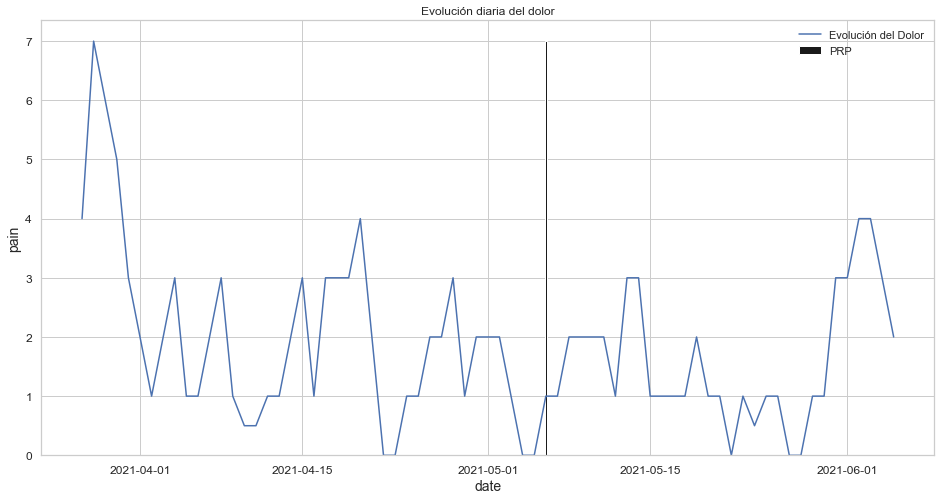

In [5]:
plt.figure()
plt.title('Evolución diaria del dolor')
sns.lineplot(y = pain.pain, x =pain.index,label='Evolución del Dolor' )
plt.savefig('images/dolor_diario.png')
plt.bar(x=pd.to_datetime(['2021-05-06']),height=7,width=0.2,color='k',label='PRP')
plt.legend()
plt.show()
plt.close()

In [6]:
pain.head()

,pain,leg_fatigue,total_fatigue,nsaids,colageno
date,,,,,
2021-03-27,4.0,2,2,False,False
2021-03-28,7.0,10,10,False,False
2021-03-29,6.0,8,8,False,False
2021-03-30,5.0,6,6,False,False
2021-03-31,3.0,3,4,False,False


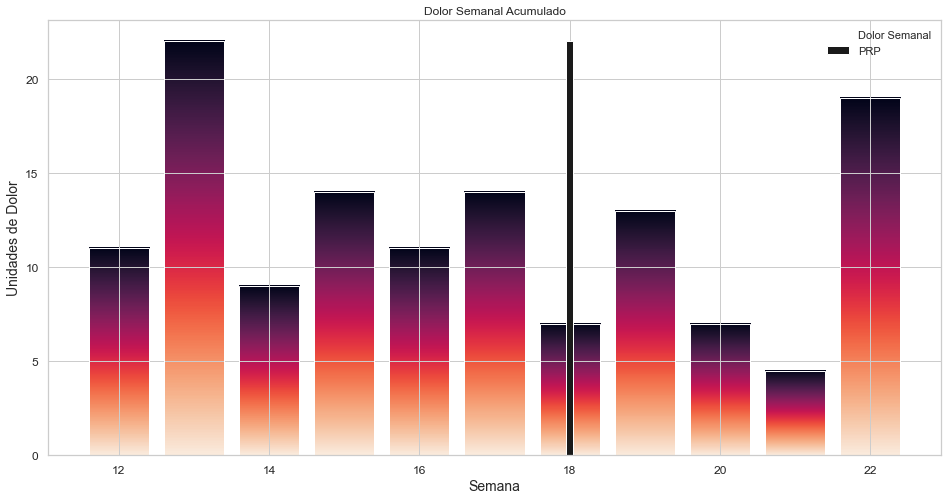

In [7]:
aux = pain.reset_index()
aux['week'] = aux.date.dt.week
aux = aux.groupby(['week']).sum().reset_index()

fig, ax = plt.subplots()
bar = ax.bar(aux.week.values, aux.pain.values,label='Dolor Semanal')
gradientbars(bar)
plt.title("Dolor Semanal Acumulado")
plt.ylabel('Unidades de Dolor')
plt.bar(x=pd.to_datetime(['2021-05-06']).week,height=22,width=0.1,color='k',label='PRP')
plt.xlabel('Semana')
plt.legend()
plt.savefig('images/dolor_semanal.png')
plt.show()

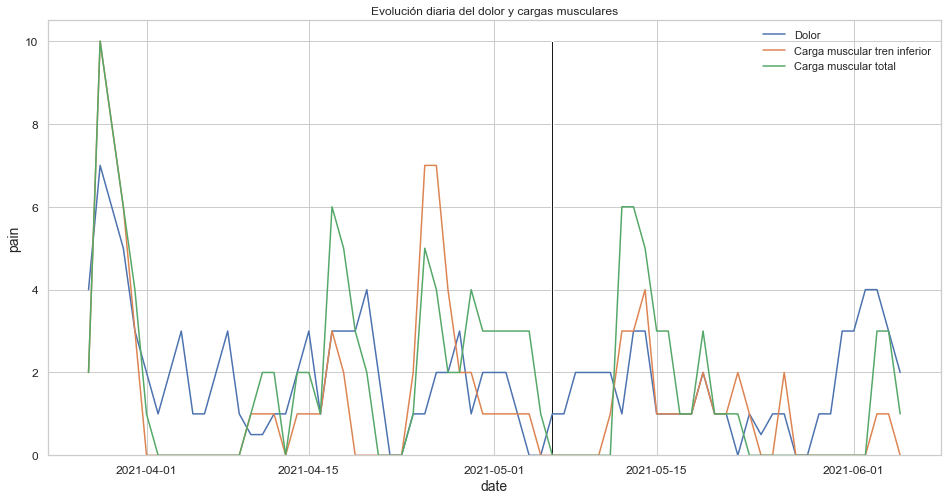

In [8]:
plt.figure()
plt.title('Evolución diaria del dolor y cargas musculares')
sns.lineplot(y = pain.pain, x =pain.index,label = 'Dolor')
sns.lineplot(y = pain.leg_fatigue, x =pain.index,label = 'Carga muscular tren inferior')
sns.lineplot(y = pain.total_fatigue, x =pain.index,label = 'Carga muscular total')
plt.bar(x=pd.to_datetime(['2021-05-06']),height=10,width=0.2,color='k',label='PRP')
plt.savefig('images/dolor_cargas_diario.png')
plt.show()
plt.close()

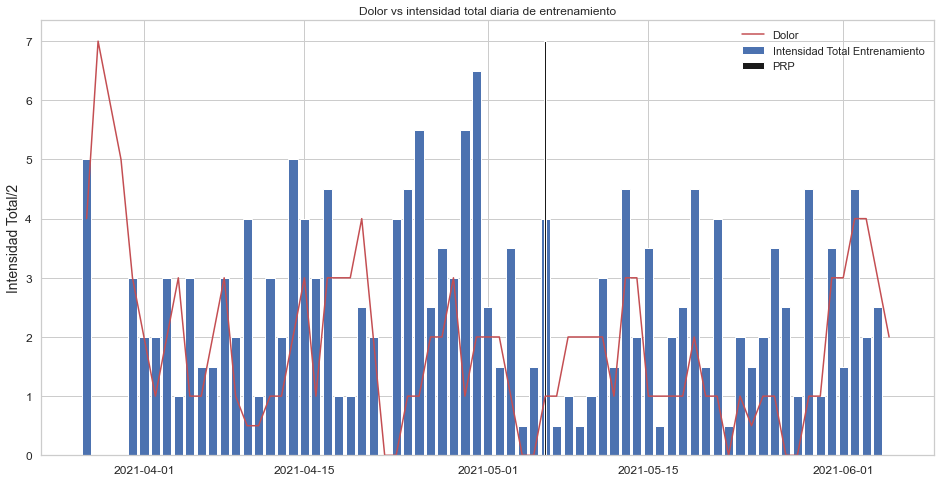

In [9]:
aux = sports.drop(columns="time").groupby(["date"]).agg("sum").reset_index()

aux = pd.merge(pain.reset_index(),aux,on='date')

plt.figure()
plt.title('Dolor vs intensidad total diaria de entrenamiento')
plt.bar(aux.date,aux.total_intensity/2,label='Intensidad Total Entrenamiento')
plt.ylabel('Intensidad Total/2')
plt.bar(x=pd.to_datetime(['2021-05-06']),height=7,width=0.2,color='k',label='PRP')
plt.plot(aux.date,aux.pain,c='r',label='Dolor')
plt.savefig('images/dolor_int_total.png')
plt.legend()
plt.show()
plt.close()

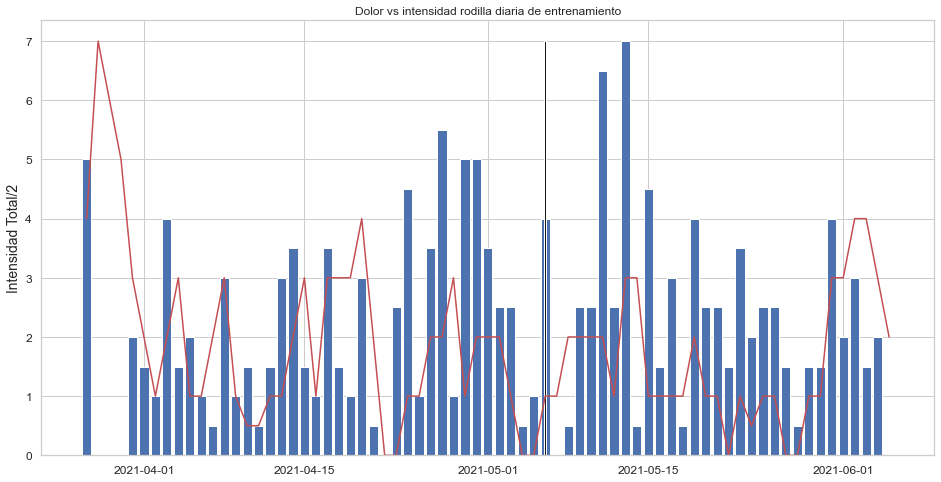

In [10]:
aux = sports.drop(columns="time").groupby(["date"]).agg("sum").reset_index()

aux = pd.merge(pain.reset_index(),aux,on='date')

plt.figure()
plt.title('Dolor vs intensidad rodilla diaria de entrenamiento')
plt.bar(aux.date,aux.knee_intensity/2,label='Intensidad Rodilla Entrenamiento')
plt.ylabel('Intensidad Total/2')
plt.plot(aux.date,aux.pain,c='r',label='Dolor')
plt.bar(x=pd.to_datetime(['2021-05-06']),height=7,width=0.2,color='k',label='PRP')
plt.savefig('images/dolor_int_rodilla.png')
plt.show()
plt.close()

In [11]:
aux = sports.groupby(["date",'sport']).agg("sum").reset_index()
aux = pd.merge(pain.reset_index(),aux,on='date')

In [12]:
aux2 = pd.merge(aux[aux['sport'] =='Kite'],pain,on='date',how='right').fillna(0)
aux3 = pd.merge(aux[aux['sport'] =='CF'],pain,on='date',how='right').fillna(0)

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
ax1.plot(aux.date,aux.pain)
ax2.bar(aux2.date,aux2.time)
ax3.bar(aux3.date,aux3.time)
plt.close()

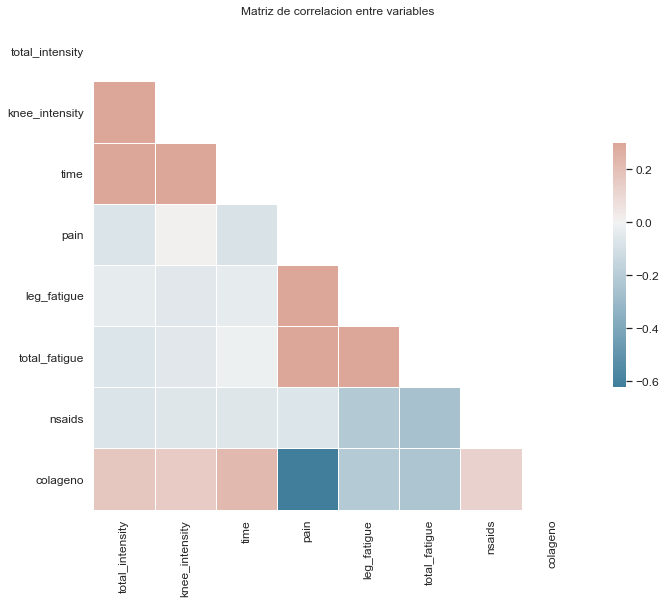

In [14]:

aux = pd.merge(sports.reset_index(),pain.reset_index(),on='date')

aux.groupby(['date','sport']).sum().reset_index()
# Compute the correlation matrix
corr = aux.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Matriz de correlacion entre variables')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('images/corr.png')
plt.show()
plt.close()

In [30]:
post = pain[pain.index > '2021-05-06'].pain.values
pre = pain[pain.index < '2021-05-06'].pain.values

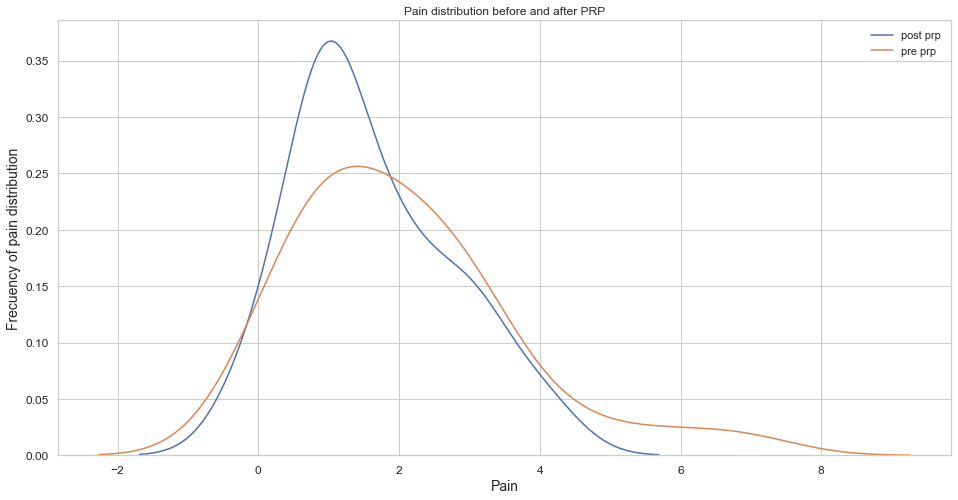

In [37]:
plt.figure()
plt.xlabel('Pain')
plt.ylabel('Frecuency of pain distribution')
sns.kdeplot(post,label='post prp')
sns.kdeplot(pre,label='pre prp')
plt.legend()
plt.title('Pain distribution before and after PRP')
plt.savefig('images/pain_distribution.png')
plt.show()

In [38]:
colag = pain[pain['colageno']==True].pain.values
no_colag = pain[pain['colageno']==False].pain.values

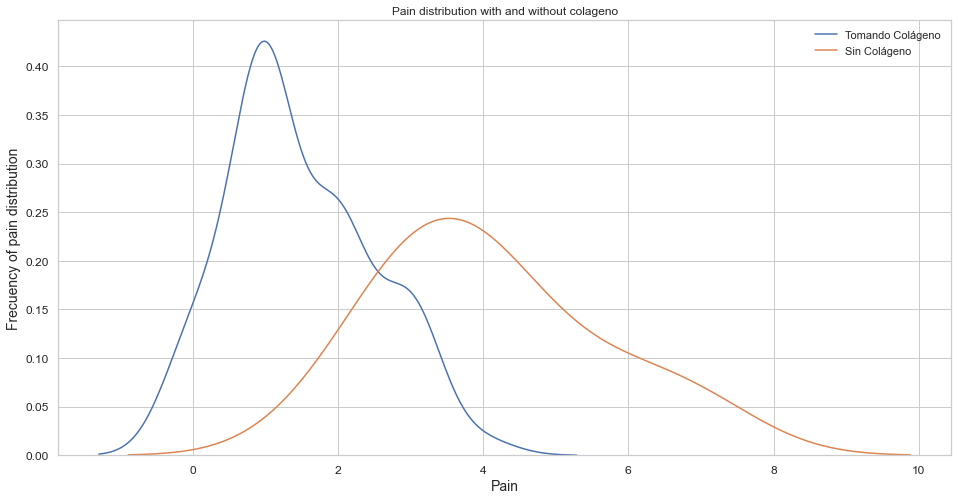

In [39]:
plt.figure()
plt.xlabel('Pain')
plt.ylabel('Frecuency of pain distribution')
sns.kdeplot(colag,label='Tomando Colágeno')
sns.kdeplot(no_colag,label='Sin Colágeno')
plt.legend()
plt.title('Pain distribution with and without colageno')
plt.savefig('images/colageno_distribution.png')
plt.show()

In [40]:
pain.colageno.unique()

array([False,  True])